In [1]:
import numpy as np
from scipy.optimize import minimize, approx_fprime
from scipy.signal import find_peaks

import pylab
import matplotlib.pyplot as plt

### Задание 1

Придумайте функции со следующими свойствами (в a) b) c) область определения X любая, какая вам удобна, главное - функция с нужными свойствами):

a) бесконечное количество локальных экстремумов

$y = sin x$

b) 2 локальных экстремума

$y=1/5*x^3 + 5*x^2$

с) 3 локальных экстремума

$y=(1/5*x^3 + 5*x^2)^2$

d*) область определения функции - 1 точка

$\sqrt{-(x-1)^2-(y-2)^2}$

Если не ошибаюсь, данная функция может быть определена только в точке (1,2)

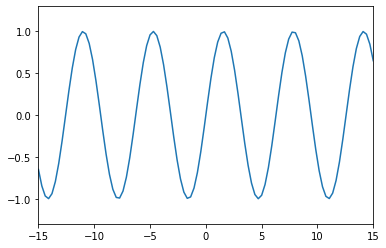

In [2]:
def f_1(x):
    return np.sin(x)
x = np.linspace(-15,15,100)
y_1 = f_1(x)
pylab.plot(x,y_1)
pylab.axis([-15,15,-1.3,1.3])
pylab.show()

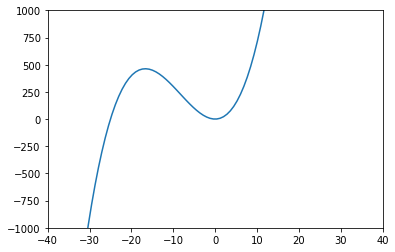

In [3]:
def f_2(x):
    return 1/5*x**3+5*x**2
x = np.linspace(-40,40,100)
y_2 = f_2(x)
pylab.plot(x,y_2)
pylab.axis([-40,40,-1000,1000])
pylab.show()

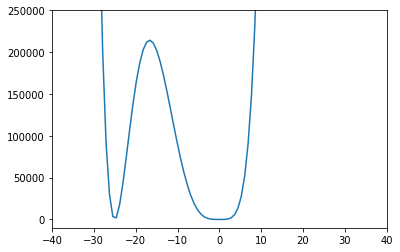

In [4]:
def f_3(x):
    return (1/5*x**3+5*x**2)**2
x = np.linspace(-40,40,100)
y_3 = f_3(x)
pylab.plot(x,y_3)
pylab.axis([-40,40,-10000,250000])
pylab.show()

### Задание 2

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$

Порядок расчета первой производной:
- производная от квадрата
- производная от синуса
- производная от линейной функция

$2sin(2x+1)*cos(2x+1)*2=4sin(2x+1)cos(2x+1)$

Порядок расчета второй производной:
- коэффициент (4) выносим за скобки
- производная синуса
- производная функции внутри синуса
- произовдная косинуса
- призводная функция внутри косинуса

$4 * cos(2x+1) * 2 * (-sin(2x+1)) * 2 = -16cos(2x+1)sin(2x+1)$

### Задание 3: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

Расчет на бумажке

$f'_x=2*2*x*y^3 - 1/(x^2) + y^2 = 4xy^3 - 1/(x^2)+y^2$

$f'_y=2*x^2*3y^2 + 2yx = 6x^2y^2+2yx$

$f'_x(1,2) = 4*8-1+4 = 35$

$f'_y(1,2) = 6*4 + 2*2 = 28$

$grad_f(1,2) = (35, 28)$

Расчет с помошью numpy

In [5]:
def f(x, c0):
    return 2*x[0]**2*x[1]**3 + 1/x[0] + x[0]*x[1]**2 + c0

c0 = 7
eps = np.sqrt(np.finfo(float).eps)
approx_fprime([1,2], f, [eps, eps], c0)

array([35.00000024, 28.00000024])

### Задание 4:

Градиентный спуск своими руками

In [6]:
def f_for_grad(x):
    return (x[0]**2) + (x[1]**2) 

In [7]:
x0 = np.array([100, 200])
lr = 0.1
x = x0

In [8]:
for i in range(100):
    # Calculate gradient
    grad = approx_fprime(x, f_for_grad, [1e-6, 1e-6])# Your code here (функция для вычисления градиента есть в лекционном ноутбуке)
    
    # Update x with gradient
    x = x-lr*grad# Your code here (смотри слайд презентации про градиентный спуск)):
    if (i+1)%5==0:
        print(f"step {i+1} point: ({x[0]:.6f}, {x[1]:.6f}) with value {f_for_grad(x):.6f}")

step 5 point: (32.768000, 65.536000) with value 5368.709096
step 10 point: (10.737418, 21.474836) with value 576.460729
step 15 point: (3.518437, 7.036874) with value 61.896992
step 20 point: (1.152921, 2.305843) with value 6.646137
step 25 point: (0.377789, 0.755578) with value 0.713623
step 30 point: (0.123794, 0.247588) with value 0.076624
step 35 point: (0.040564, 0.081129) with value 0.008227
step 40 point: (0.013292, 0.026584) with value 0.000883
step 45 point: (0.004355, 0.008711) with value 0.000095
step 50 point: (0.001427, 0.002854) with value 0.000010
step 55 point: (0.000467, 0.000935) with value 0.000001
step 60 point: (0.000153, 0.000306) with value 0.000000
step 65 point: (0.000050, 0.000100) with value 0.000000
step 70 point: (0.000016, 0.000032) with value 0.000000
step 75 point: (0.000005, 0.000010) with value 0.000000
step 80 point: (0.000001, 0.000003) with value 0.000000
step 85 point: (0.000000, 0.000001) with value 0.000000
step 90 point: (-0.000000, -0.000000) w

In [9]:
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f_for_grad(x))

Минимум достигается в:  [-4.7962964e-07 -4.5925928e-07]
Значение функции в минимуме:  4.4096367809465753e-13


Проверка с помощью встроенной функции numpy: 

In [10]:
res = minimize(f_for_grad, x0, method='nelder-mead', options={'xtol': lr, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000044
         Iterations: 42
         Function evaluations: 80
